<a href="https://colab.research.google.com/github/natanascimento/image-processing/blob/main/notebooks/Atividade_Segmenta%C3%A7%C3%A3o_de_imagens_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download das imagens

In [2]:
!wget https://raw.githubusercontent.com/natanascimento/image-processing/main/assets/cancun.jpg
!wget https://raw.githubusercontent.com/natanascimento/image-processing/main/assets/new_york.jpg

--2022-06-01 18:30:50--  https://raw.githubusercontent.com/natanascimento/image-processing/main/assets/cancun.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 219883 (215K) [image/jpeg]
Saving to: ‘cancun.jpg.1’

cancun.jpg.1        100%[===================>] 214.73K  --.-KB/s    in 0.02s   

2022-06-01 18:30:50 (13.3 MB/s) - ‘cancun.jpg.1’ saved [219883/219883]

--2022-06-01 18:30:50--  https://raw.githubusercontent.com/natanascimento/image-processing/main/assets/new_york.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 332

## Imports iniciais

In [3]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import try_all_threshold
import matplotlib.pyplot as plt
from skimage import data
import cv2 as cv

## Questão 1

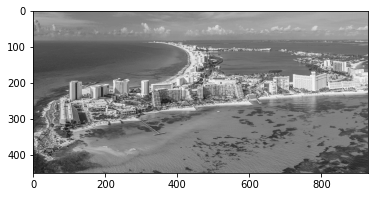

In [4]:
cancun = cv.imread("/content/cancun.jpg", 0)
plt.imshow(cancun, cmap="gray")

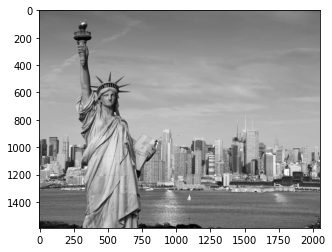

In [5]:
new_york = cv.imread("/content/new_york.jpg", 0)
plt.imshow(new_york, cmap="gray")

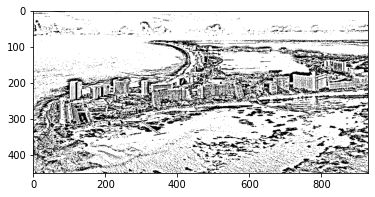

In [6]:
from skimage.filters import threshold_local 

block_size = 35
local_thresh = threshold_local(cancun, block_size, offset = 10)
binary_local = cancun > local_thresh

plt.imshow(binary_local, cmap="gray") 

Threshold escolhido:  141


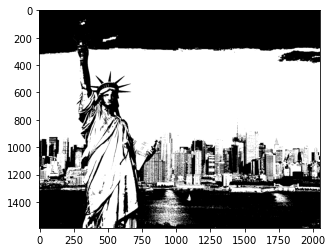

In [7]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(new_york)
binaryT = new_york > thresh

print("Threshold escolhido: ", thresh)
plt.imshow(binaryT, cmap="gray") 

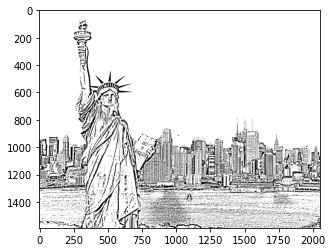

In [8]:
from skimage.filters import threshold_local 

block_size = 35
local_thresh = threshold_local(new_york, block_size, offset = 10)
binary_local = new_york > local_thresh

plt.imshow(binary_local, cmap="gray") 

## Questão 2

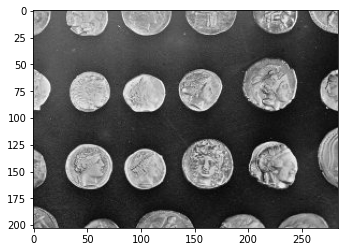

In [9]:
image = data.coins()[50:-50, 50:-50]
plt.imshow(image, cmap="gray")

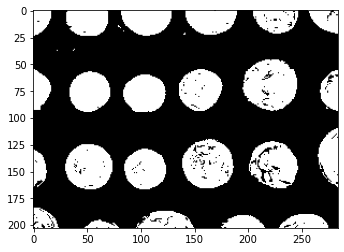

In [10]:
thresh = threshold_otsu(image)
binaryC = image > thresh
plt.imshow(binaryC, cmap="gray")

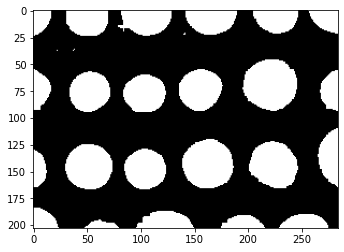

In [11]:
from skimage.morphology import closing, square
newBinary = closing(binaryC, square(5))
plt.imshow(newBinary, cmap="gray")

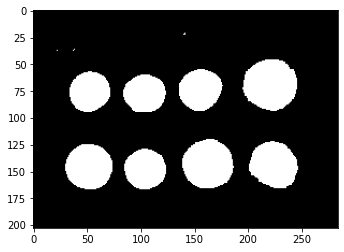

In [12]:
from skimage.segmentation import clear_border
imgCB = clear_border(newBinary)
plt.imshow(imgCB, cmap="gray")

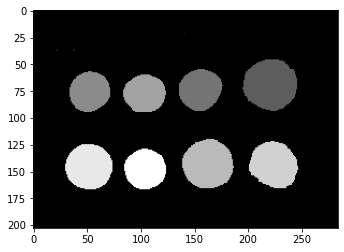

In [13]:
from skimage.measure import label
from skimage.color import label2rgb

li = label(imgCB)
plt.imshow(li, cmap="gray")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  """Entry point for launching an IPython kernel.


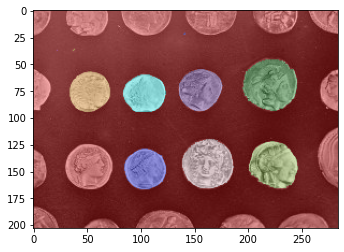

In [14]:
image_label_overlay = label2rgb(li, image = image)
plt.imshow(image_label_overlay, cmap="gray")

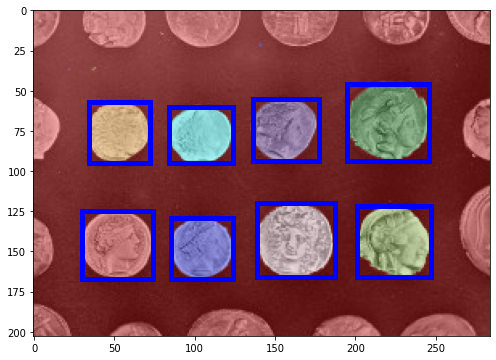

In [15]:
from skimage.measure import regionprops
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(image_label_overlay)

for region in regionprops(li):
  if region.area >= 100:
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='blue', linewidth=5)
    ax.add_patch(rect)